# Report 3: Mauna Loa Carbon Dioxide Levels

## Jillian Annis

### Introduction

Since March 1958, the average monthly mol fractions of carbon dioxide, $CO_2$, present in the atmosphere have been measured at the NOAA Mauna Loa Observatory on the Island of Hawaii and made available to the public.  The $CO_2$ mol fraction is expressed as the number of $CO_2$ molecules in 1,000,000 molecules of dry air (no water vapor present), or parts per million (ppm).  It is this data that will be used and analyzed in this report.

### Task Statement

In this report, the Mauna Loa $CO_2$ levels will be analyzed.  First, the data will be loaded into a NumPy array using the "loadtxt" function.  Then, the carbon dioxide levels will be plotted versus the years.  After this, two regression models, linear and quadratic, will be fit to the data.  Using these regressions, carbon dioxide levels in 2050 and 2100 will be predicted.  Next, the residuals of the difference between the original data and each regression will be plotted.  Finally, the seasonally variation will be examined by plotting the quadratic residuals, the mean monthly residuals, and the quadratic residuals minus the mean monthly residuals versus the month.

### Method and Results

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Exercise 1: Load and Plot the Data

In [2]:
data=loadtxt("co2_mm_mlo.txt", skiprows=72)

The 'loadtxt' function is used to import the Mauna Loa $CO_2$ data.  The 'skiprows' keyword argument is used to skip the 72 rows of text that is present in the text file, so that only the numerical data is imported. 

In [3]:
year=data[:,2]
CO2=data[:,4]

From the imported data, we are only interested in the decimal date (defined as year) and interpolated $CO_2$ (defined as CO2) data columns.  Since the index starts at 0, we want to select columns 2 and 4.  Therefore, the ':' is used to select all rows in the column, followed by the index of the desired column.

The code below is used to generate the plot of the carbon dioxide level versus the year.  From now on, this will be referred to as the Original data.

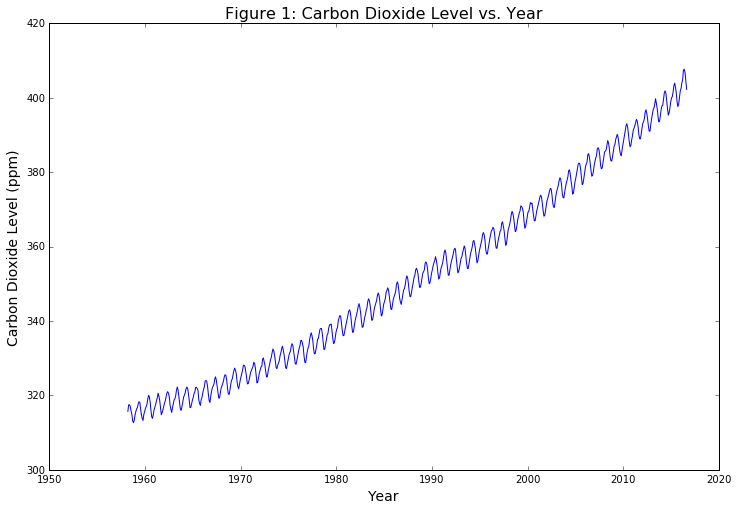

In [4]:
figure(figsize=(12,8))
title("Figure 1: Carbon Dioxide Level vs. Year", fontsize='16')
xlabel("Year", fontsize='14')
ylabel("Carbon Dioxide Level (ppm)", fontsize='14')
plot(year,CO2, color='b');

**Figure 1** shows the plot of the carbon dioxide level plotted against the year.  The overall trend is that as each year passes, the carbon dioxide level increases.  Within this increasing trend, there is a cyclic pattern.  This means that even though the overall $CO_2$ levels increase, the level within a year is both increasing and decreasing during specific times throughout that year.

#### Exercise 2: Linear Regression

In [5]:
xbar=mean(year)
ybar=mean(CO2)
x2bar=mean(year**2)
xybar=mean(year*CO2)

For the linear regression, the linear equations $\begin{bmatrix} 1 & \bar{x} \\ \bar{x} & \bar{x^2}\end{bmatrix}$ $\begin{bmatrix} w_0 \\ w_1\end{bmatrix}$ = $\begin{bmatrix} \bar{y} \\ \bar{xy}\end{bmatrix}$ must be solved.  

First, the variables $\bar{x}$, $\bar{y}$, $\bar{x^2}$, $\bar{xy}$ must be defined.
* $\bar{x}$ (xbar) is calculated by taking the mean of the year data
* $\bar{y}$ (ybar) is calculated by taking the mean of the $CO_2$ data
* $\bar{x^2}$ (x2bar) is calculated by taking the mean of the square of the year data
* $\bar{xy}$ (xybar) is calculated by taking the mean of the product of the year and $CO_2$ data

In [6]:
A=array([[1,xbar],[xbar,x2bar]])
b=array([ybar, xybar])
w0,w1=linalg.solve(A,b)
LinReg=w0+w1*year

With the variables defined, we can create the above matrices.  A is the first matrix containing 1 and $\bar{x}$ in the first row, and then $\bar{x}$ and $\bar{x^2}$ in the second.  The second matrix, b, contains $\bar{y}$ and $\bar{xy}$.  $w_0$ and $w_1$ are found by using the linalg.solve function available in NumPy to solve the above linear equations using matrices A and b.  After $w_0$ and $w_1$ are found, we can write the linear regression equation,

$$LinReg=w_0+w_1year$$.

The code below uses the LinReg equation to plot the linear regression on the same graph as the Original data.

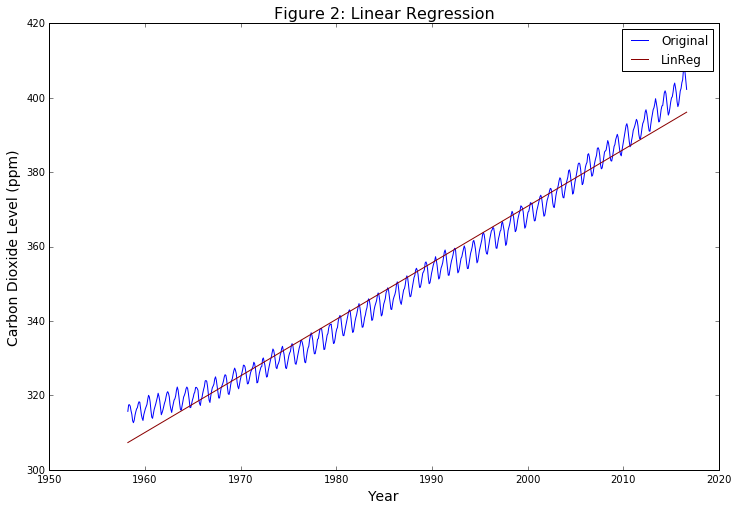

In [7]:
figure(figsize=(12,8))
title("Figure 2: Linear Regression", fontsize='16')
xlabel("Year", fontsize='14')
ylabel("Carbon Dioxide Level (ppm)", fontsize='14')
plot(year,CO2, label='Original', color='b')
plot(year, LinReg, label='LinReg', color='darkred')
legend();

**Figure 2** contains both the Original data and the associated linear regression.  It is clear that a linear regression is not a good fit for the data.  The line is mostly above or below the curve, which means that the regression is either overestimating or underestimating the $CO_2$ level.  

Using the LinReg equation, we can attempt to predict the $CO_2$ levels in the years 2050 and 2100.

In [8]:
#Predicted Carbon Dioxide Levels in Year 2050
P=w0+w1*2050
print("The Predicted Carbon Dioxide Level in 2050 is",P,"ppm")

#Predicted Carbon Dioxide Levels in Year 2100
Q=w0+w1*2100
print("The Predicted Carbon Dioxide Level in 2100 is",Q,"ppm")

The Predicted Carbon Dioxide Level in 2050 is 446.875212775 ppm
The Predicted Carbon Dioxide Level in 2100 is 522.892624736 ppm


Next, we can find the residuals of the linear regression. This is done by subtracting the linear regression values from the corresponding $CO_2$ data.  The code below does this and then plots the results.

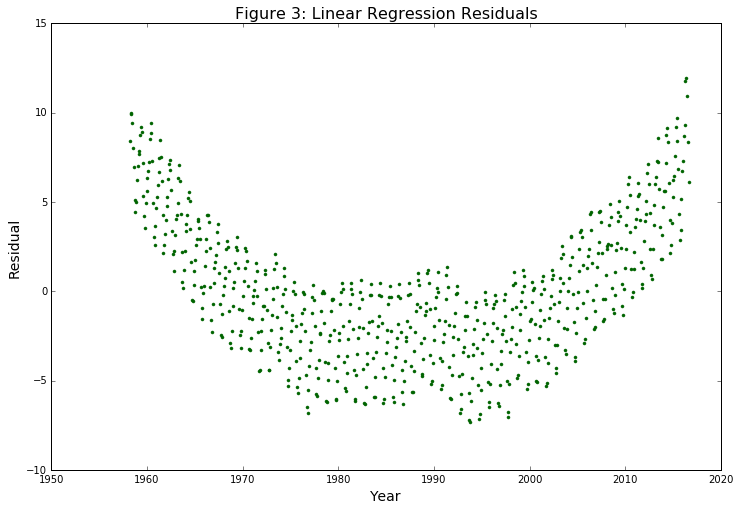

In [9]:
LinResid=CO2-LinReg

figure(figsize=(12,8))
plot(year, LinResid, color='darkgreen', marker='.', ls='none')
xlabel("Year", fontsize='14')
ylabel("Residual", fontsize='14')
title("Figure 3: Linear Regression Residuals", fontsize='16');

**Figure 3** is the plot of the residuals of the linear regression.  First, the residuals confirm that the linear regression is not a good fit because the majority of the residual values fall above or below 0.  This means that the regression is either above or below the Original data most of the time, and as stated before, the regression is over or underestimating the data.

Also from the plot, the largest residual is +11, while the lowest residual is -6.  Positive residuals mean the model value is less than the actual value, and negative residuals mean that the model value is greater than the actual value.  Since the range of the residuals is uneven, it means that the overestimated values tend to be closer to the actual values than the underestimated values.

Lastly, the residual plot has a distinct quadratic shape.  This also illustrates the point that a linear model is not appropriate.  For a linear model to be a good fit, the points on the residual plot must form a random pattern about the horizontal axis.  Since this is not the case, we know that a non-linear regression should be used, and thus a quadratic regression will be tried next.

#### Exercise 3: Quadratic Regression

In [10]:
x3bar=mean(year**3)
x4bar=mean(year**4)
x2ybar=mean(year**2*CO2)

For the quadratic regression, the linear equations $\begin{bmatrix} 1 & \bar{x} & \bar{x^2} \\ \bar{x} & \bar{x^2} & \bar{x^3} \\ \bar{x^2} & \bar{x^3} & \bar{x^4}\end{bmatrix}$ $\begin{bmatrix} w_0 \\ w_1 \\ w_2\end{bmatrix}$ = $\begin{bmatrix} \bar{y} \\ \bar{xy} \\ \bar{x^2y}\end{bmatrix}$ must be solved.

First, more variables must be defined.
* $\bar{x^3}$ (x3bar) is calculated by taking the mean of the cube of the year data
* $\bar{x^4}$ (x4bar) is calculated by taking the mean of the year data raised to the fourth power
* $\bar{x^2y}$ (x2ybar) is calculated by taking the mean of the product of the year squared and the $CO_2$ data

In [11]:
C=array([[1,xbar,x2bar],[xbar,x2bar,x3bar], [x2bar,x3bar,x4bar]])
d=array([ybar,xybar,x2ybar])
W0,W1,W2=linalg.solve(C,d)
QuadReg=W0+W1*year+W2*year**2

Now that all variables defined, the required matrices are created using the code above, and linalg.solve is used to find the three coefficients, $W_0$, $W_1$, and $W_2$, needed for the quadratic model, $$QuadReg=W_0+W_1year+W_2year^2$$  


Using this equation, we can plot the quadratic model and the Original data using the code below.

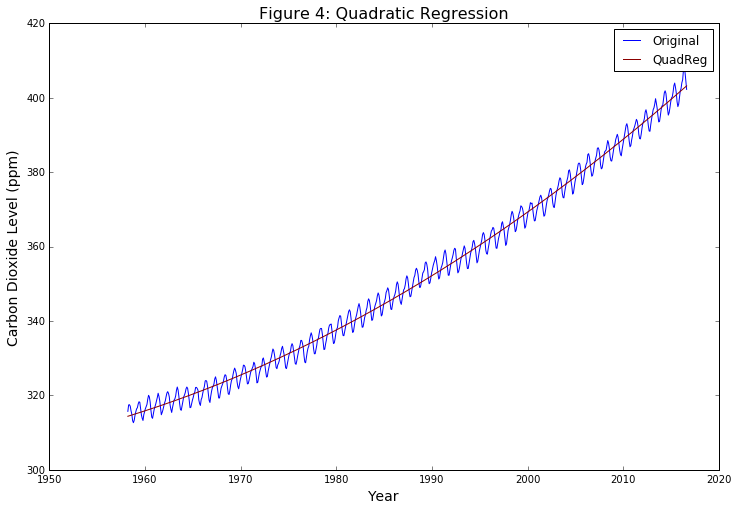

In [12]:
figure(figsize=(12,8))
title("Figure 4: Quadratic Regression", fontsize='16')
xlabel("Year", fontsize='14')
ylabel("Carbon Dioxide Level (ppm)", fontsize='14')
plot(year,CO2, label='Original', color='b')
plot(year, QuadReg, label='QuadReg', color='darkred')
legend();

**Figure 4** is the plot of the Original data with the quadratic regression.  The model seems to go through the middle of the data, and it matched the increasing trend of the Original graph.  Therefore, the quadratic model appears to be a good fit for the $CO_2$ data.  We can check this by examining the residual plot.  Below is the code that does just that.

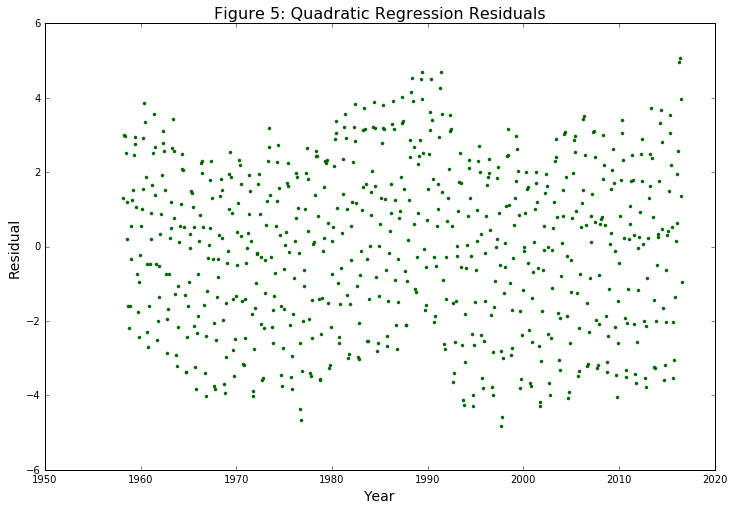

In [13]:
QuadResid=CO2-QuadReg

figure(figsize=(12,8))
plot(year, QuadResid, color='darkgreen', marker='.', ls='none')
xlabel("Year", fontsize='14')
ylabel("Residual", fontsize='14')
title("Figure 5: Quadratic Regression Residuals", fontsize='16');

**Figure 5** is the residual plot for the quadratic model.  Unlike the linear residual plot (**Figure 3**), the residuals do not form any distinct pattern, although the underlying cyclic variation is somewhat present.  Even so, the lack of a prominent pattern means that the model is a good fit.  Also, the residuals range from +5 to -5.  Since the lower and upper limits of the range are the same, this means that the model overestimates and underestimates the values by the same amount, unlike the linear model which underestimated values by a greater amount.

Because the quadratic regression is an appropriate model, we can better predict the future carbon dioxide levels.

In [14]:
#Predicted Carbon Dioxide Levels in Year 2050
p=W0+W1*2050+W2*2050**2
print("The Predicted Carbon Dioxide Level in 2050 is",p,"ppm")

#Predicted Carbon Dioxide Levels in Year 2100
q=W0+W1*2100+W2*2100**2
print("The Predicted Carbon Dioxide Level in 2100 is",q,"ppm")

The Predicted Carbon Dioxide Level in 2050 is 492.085188397 ppm
The Predicted Carbon Dioxide Level in 2100 is 677.138946176 ppm


Compared to the linear model, the quadratic model's predicted 2050 and 2100 levels are higher:
* 2050: Linear = 446.9ppm; Quadratic = 492.1ppm
* 2100: Linear = 522.9ppm; Quadratic = 677.1ppm

#### Exercise 4: Seasonal Variation

Finally, we will analyze the seasonal variation present within the Original data.  To do this, we first plot the quadratic residuals for each month of the year.

Within the imported data, the month column is the column with the index of 1.  Thus, data[:,1] is used to only select all the rows in the column that is indexed 1.  On the following plot, this month data is the x values, while the quadratic residuals are y values.

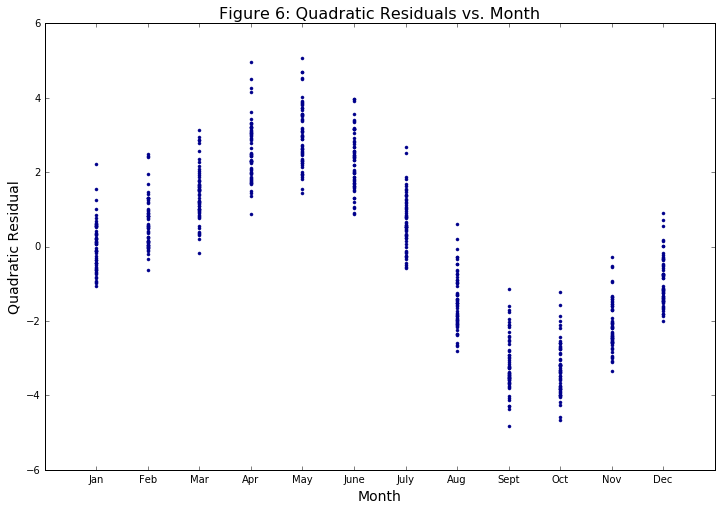

In [15]:
month=data[:,1]

figure(figsize=(12,8))
xlim(0,13)
title("Figure 6: Quadratic Residuals vs. Month", fontsize='16')
xlabel("Month", fontsize='14')
xticks(arange(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))
ylabel("Quadratic Residual", fontsize='14')
plot(month, QuadResid, color='darkblue', marker='.', ls='none');

**Figure 6** shows the quadratic residuals for each month of the year.  During the spring months, April, May, and June, the actual carbon dioxide levels are higher than what the quadratic regression predicted.  Also, during the fall months, September, October, and November, the actual levels are lower than the model.

From this observation, we can say that during the spring, the $CO_2$ level is at its highest.  Then, the levels begin to drop during the summer months until it reaches its minimum level during the fall.  Finally, the levels begin to rise during the winter months, and then the cycle of increasing and decreasing levels continues for each year.

Next, we will find the mean monthly residual and plot them along with the quadratic residuals.

In [16]:
MeanMonthly=[mean(QuadResid[month==i]) for i in range(1,13)]

To create the MeanMonthly residual list, both list comprehension and boolean array indexing are used.  First, the quadratic residuals for month i only are selected.  Then, the mean of these residuals is calculated.  Finally, the resulting mean value is stored into the list.  This process repeats for all 12 months, and the result is a list that contains the mean monthly averages, with the January mean being the first entry and the December mean as the last.

The mean monthly residuals are then plotted against their month.

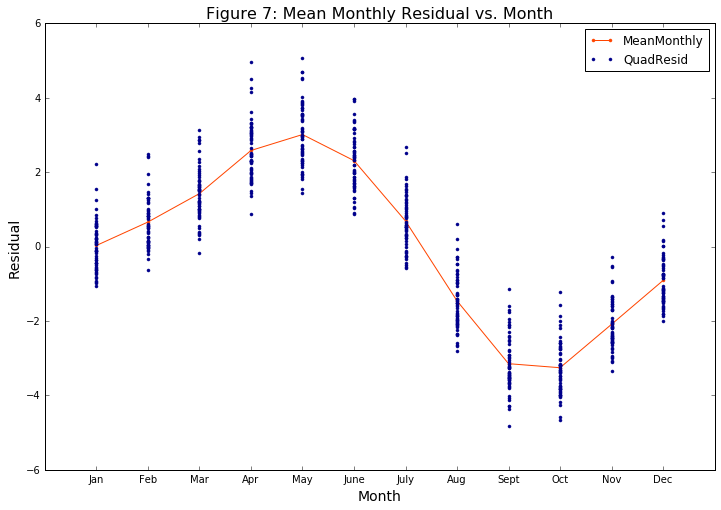

In [17]:
figure(figsize=(12,8))
xlim(0,13)
title("Figure 7: Mean Monthly Residual vs. Month", fontsize='16')
xlabel("Month", fontsize='14')
xticks(arange(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'))
ylabel("Residual", fontsize='14')
plot(arange(1,13), MeanMonthly, label='MeanMonthly', color='orangered',marker='.')
plot(month, QuadResid, label='QuadResid', color='darkblue', marker='.', ls='none')
legend();

**Figure 7** shows both the quadratic residuals and their corresponding mean residuals.  Plotting the mean monthly residuals allows for the seasonal variation in **Figure 6** to be more clearly seen.

Next, we will plot the remaining residuals after removing the quadratic and mean monthly residuals.  

The problem we must solve before doing this is that we are plotting year on the x-axis, but the monthly residuals are a function of the month, not the year.  To correct this, we use list comprehension and boolean indexing once again, and the result is a list called MonthlyReg that repeats the mean monthly residuals list so that these residuals can be plotted over all the years.  We subtract 1 because indexing starts at 0, and we use int() because all the values in the month list are floats and they must be integers if we want to use them for indexing.

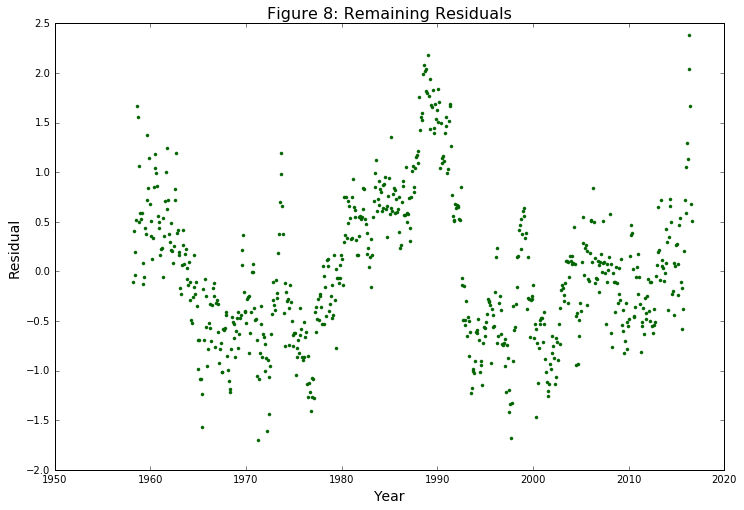

In [18]:
MonthlyReg=[MeanMonthly[int(m)-1] for m in month]
RemainResid=CO2-(QuadReg+MonthlyReg)

figure(figsize=(12,8))
xlabel("Year", fontsize='14')
ylabel("Residual", fontsize='14')
title("Figure 8: Remaining Residuals", fontsize='16')
plot(year, RemainResid, color='darkgreen', marker='.', ls='none');

**Figure 8** shows the residuals that are left after subtracting out the quadratic regression (quadratic residuals) and the corresponding mean monthly residuals from the Original $CO_2$ data.  The range of the remaining residuals is from about -1.8 to 2.5, and this is smaller than the range of just only the quadratic residuals, which range from -5 to +5.

Also, the plot looks very jagged, which could be any leftover noise that was present in the Original data due things such as any interpolation or not properly adjusting the $CO_2$ measurement to take into account the amount of $CO_2$ leaving the nearby volcano.

### Conclusion

From all this data analysis, we can conclude that atmospheric carbon dioxide levels are increasing at an increasing rate.  Within this general trend, there are seasonal variations in which the levels increase and decrease independently of the overall trend.

In this report, we imported the carbon dioxide data, fit linear and quadratic regressions to the data, and then plotted the residuals.  This was done to discover all trends in the data, and find a model that could possibly predict future $CO_2$ levels in the atmosphere.

### References

1. ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt

2. https://en.wikipedia.org/wiki/Mauna_Loa

3. https://en.wikipedia.org/wiki/Climate_of_Hawaii